## Calculus Review
#### Differentiation
The key to calculus (in fact the fundamental theorem of calculus) states:

$$
\frac{d}{dx}\int_{a}^{x} f(t)dt = f(x)
$$

or if you prefer:

$$
\int_{a}^{b} f(x)dx = F(b) - F(a)
$$

This is important because it equates integral and differential calculus.

The definition of a derivative is:

$$
\frac{dy}{dx} = \lim_{h\to 0}\frac{f(x+h) - f(x)}{h}
$$

Understanding the definition of a derviative is important because computers are by nature discrete machines and thus cannot deal with continuous differentiation or integration. It instead uses approximation with h becoming incredibly small.

#### Chain Rule
Differentiation is important, but as functions get complicated, it becomes important to remember how to differentiate functions with multiple components. This is where chain rule comes into play. It is used extensively in machine learning (see backpropagation for an example). It can be defined as:

$$
\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}
$$

To put this into perspective, if a mathematical model has multiple internal parameters that need to be updated (i.e. different weights) then we need to update the error calculation with respect to the individual weight. This will result in different paths and requires using the chain rule. Let's take a look at a more concrete example:

#### Gradients
Gradients are used all over in system identification. The easiest way to think about it is the partial derivative of each variable in a with a multivariable function:

$$
\nabla f(p) = \begin{bmatrix}
               \frac{\partial f}{\partial x_1} (p) \\
               . \\
               . \\
               . \\
               \frac{\partial f}{\partial x_n} (p)
              \end{bmatrix}
$$

In hyperdimensional planes, this gradient is used to calculate the direction and fastest increase (or fastest decrease if the vector is negated). This is where gradient descent, hill climbing, etc. is derived.

#### Optimization
Back in Calculus I/II the term critical points was likely used a lot. These denoted maxima or minima of a function (local or global). These exist when the derivative of a function is 0. Because of the 0 slope, this means these points are either saddle points, maxima, or minima. All are important areas of study and points to watch out for in machine learning and system identification as they can create traps that our models can get stuck in.  

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


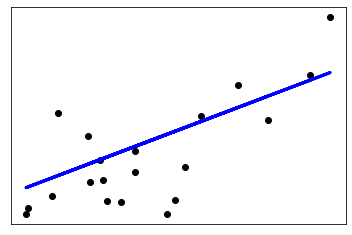

In [23]:
"""
Linear Regression Example from SKLearn
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
"""
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

[897.84229684 146.4002434 ]
Mean squared error: 2407.87
Coefficient of determination: 0.50


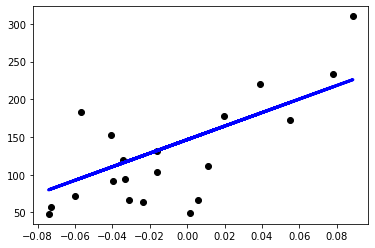

In [20]:
"""
Linear Regression by hand
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

eta = 0.05
beta = np.array([0., 0.])
def err_func(y, yhat):
    return np.sum(np.square(y-yhat))

def grad_desc(x, y, beta, eta, epochs=75):
    for epoch in range(epochs):
        for i,sample in enumerate(x):
            h = sample * beta[0] + beta[1] #linear regression equation
#             print(h.shape)
            loss = err_func(h, y[i])
#             print(loss.shape)
            partialL_partialyhat = 2*(h-y[i])
            partialyhat_partialbeta0 = sample
            partialyhat_partialbeta1 = 1 #bias
            grad0 = partialL_partialyhat * partialyhat_partialbeta0
            grad1 = partialL_partialyhat * partialyhat_partialbeta1
            beta[0] = beta[0] - eta * grad0
            beta[1] = beta[1] - eta * grad1
    return beta

beta = grad_desc(diabetes_X_train, diabetes_y_train, beta, eta)
diabetes_y_pred = diabetes_X_test * beta[0] + beta[1]
print(beta)
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')

plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.show()